# **NBA Dataset analysis**

## **Project inspiration**
When I was just 10 years old, I joined a basketball team back in Ukraine. Since then I became a massive basketball fan. Even though I had to quit playing basketball in year 12 of high school to prepare for HSC, I still kept the same passion for the game. I still watch a lot of NBA and Euroleague basketball games during my free time and support my favourite teams. 
For my Python project I decided to combine my passion for data analysis, programming, and basketball together. I decided to practice my Python data analysis skills on a big dataset containing average stats of all players starting from 1997 season.

## **Project summary**
I discovered an extensive dataset of NBA player's key statistics and attributes between the seasons of 1997 and 2022.

## **Aim**
To understand the change in NBA players over the years.  
To explore and identify the key features of the best performances during regular season across three main categories: points, rebounds, assists.


## **Method**

### Importing required libraries and the dataset
We firstly start by importing all the required libraries that will be used in later stages. Also, open the dataset using pandas csv open command and ensure that the first column is used as an index. When reading csv files often the index of the csv file is read as regular column.

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
nba_data = pd.read_csv("NBA_All_Seasons_Data.csv", index_col='Unnamed: 0')

### Dataset exploration
Firstly, let's look at the general shape of the dataset to understand some general features.

In [359]:
nba_data.shape

(12844, 21)

This dataset contains 21 columns and nearly 13k rows. After that, let's at 5 first columns just to have a look at the data itself.

In [360]:
nba_data.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [369]:
nba_data.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

After looking at the types of all the columns, there are few notable columns. Columns season, draft_year, draft_round, draft_number all contain strings rather than integers. We will have to convert some of them to be able to use them during our analysis. <br>
Next, we are going to use .describe() function to find any inconsistencies.

In [367]:
nba_data.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


A few notable points:  
- Net rating will not be taken in consideration during analysis as players that played very limited minutes could've achieved incredibly net rating scores and vise versa.
- Games played maximum is 85. While, it looks a bit odd, some players, when they get traded during the season, sometimes get to play extra few games due to differences in teams' game schedules.

In [373]:
categorical_data = nba_data.select_dtypes(exclude=[np.number])
categorical_data.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,12844,12844,10990,12844,12844,12844,12844,12844
unique,2551,36,356,82,48,9,76,27
top,Vince Carter,CLE,Kentucky,USA,Undrafted,1,Undrafted,2021-22
freq,22,450,447,10721,2358,7351,2414,605


A few notable points:  
- According to the table, there are 36 teams, while there should be only 30. This is mostly due to some of the teams either changing their names e.g. Charlotte Bobcats, or just not being in the league anymore e.g. Seattle Supersonics.
- Draft round has 9 unique entries. While the current NBA draft only contains 2 rounds, it used to contain a lot more rounds.

### Data pre-processing  
Before we start constructing any graphs, there are a few small changes that we have to make, in order to visualize data more clearly.  

During this step we are going to calculate a new variable containing height to weight ratio. Also, we will create a new column containing season years, but we will convert it to the date format.

In [362]:
nba_data['height_to_weight']= nba_data.player_height / nba_data.player_weight

In [363]:
nba_data['season_parsed'] = nba_data.season.str[-2:]
nba_data['season_parsed'] = pd.to_datetime(nba_data['season_parsed'], format="%y")

In [364]:
nba_data['season_parsed'].dtypes

dtype('<M8[ns]')

### Change of NBA over the years  
In this section, I am going to visualize how NBA transformed in its style of play and how it reflected on the players.  

We are going to start by looking how the general height to weight ratio has changes over the years.

<Axes: title={'center': 'Change in height to weight ratio over time'}, xlabel='Season year', ylabel='Height to weight ratio'>

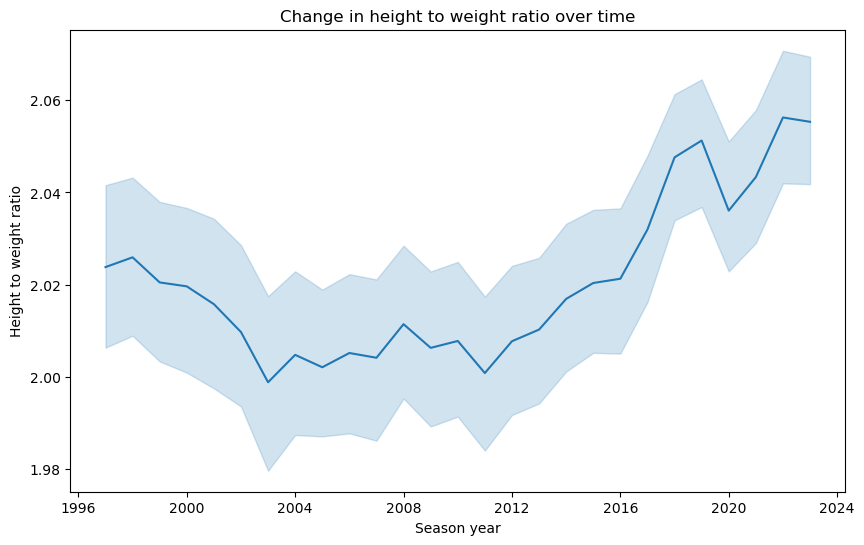

In [365]:
plt.figure(figsize=(10,6))
plt.title("Change in height to weight ratio over time")

plt.xlabel("Season year")
plt.ylabel("Height to weight ratio")
sns.lineplot(x=nba_data['season_parsed'], y=nba_data['height_to_weight'])

As can be seen from the graph above, while the general trend looked relatively stable from 1996 season and up until 2012, after that the ratio started stably increasing at a strong pace. Let's look a bit more deeply into it.

<Axes: title={'center': "Change in average player's height over time"}, xlabel='Season year', ylabel="Average player's height">

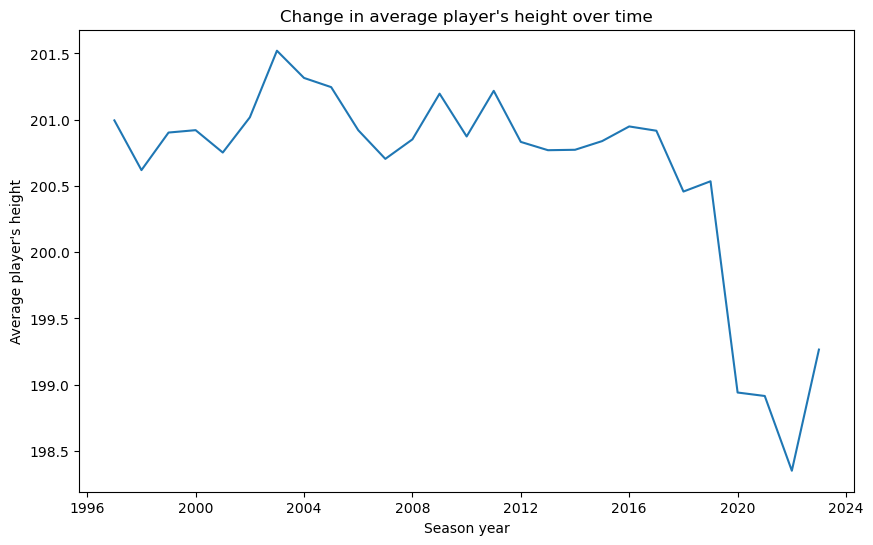

In [331]:
plt.figure(figsize=(10,6))
plt.title("Change in average player's height over time")

plt.xlabel("Season year")
plt.ylabel("Average player's height")
sns.lineplot(data=nba_data.groupby('season_parsed').player_height.mean())

<Axes: title={'center': "Change in average player's weight over time"}, xlabel='Season year', ylabel="Average player's weight">

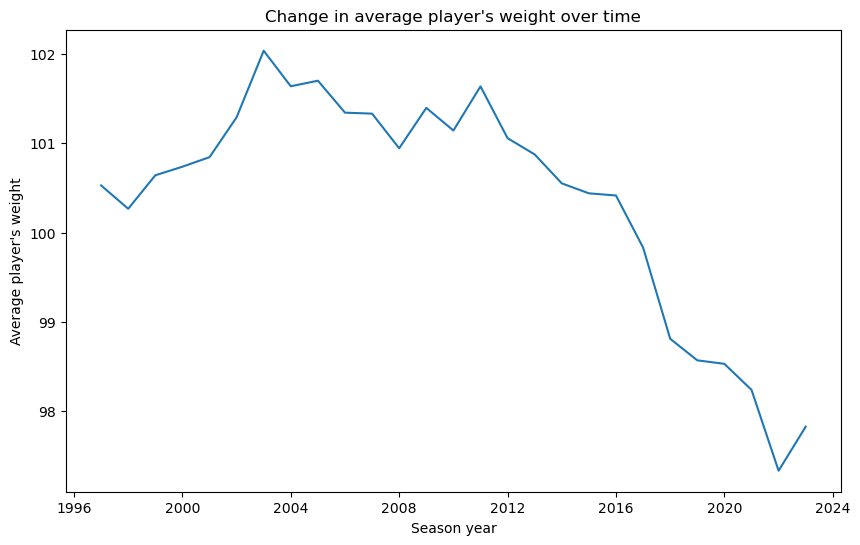

In [332]:
plt.figure(figsize=(10,6))
plt.title("Change in average player's weight over time")

plt.xlabel("Season year")
plt.ylabel("Average player's weight")
sns.lineplot(data=nba_data.groupby('season_parsed').player_weight.mean())

Both average weight and height decrease starting from 2012, but the average weight of the player experienced the more significant change over these years with a difference between maximum in 2003 and minimum at 2022 of nearly 5 kilograms. That is quite a significant drop in the average player's weight.  

Such change is mostly impacted by a considerable change in basketball philosophy over the years. In early 2000s, the basketball court was absolutly dominated by such greats like Shaquille O'Neal, Dwight Howard, and Yao Ming. This was a time of the centre role, which is usually taller and heavier. Then around 2012, the game started to shift towards more dynamic style of play with a lot more 3 pointers made and increased speed of the game. That is where our current stars like Stephen Curry, Chris Paul, and James Harden started to show their talents.

<Axes: title={'center': "Change in average player's age over time"}, xlabel='Season year', ylabel="Average player's age">

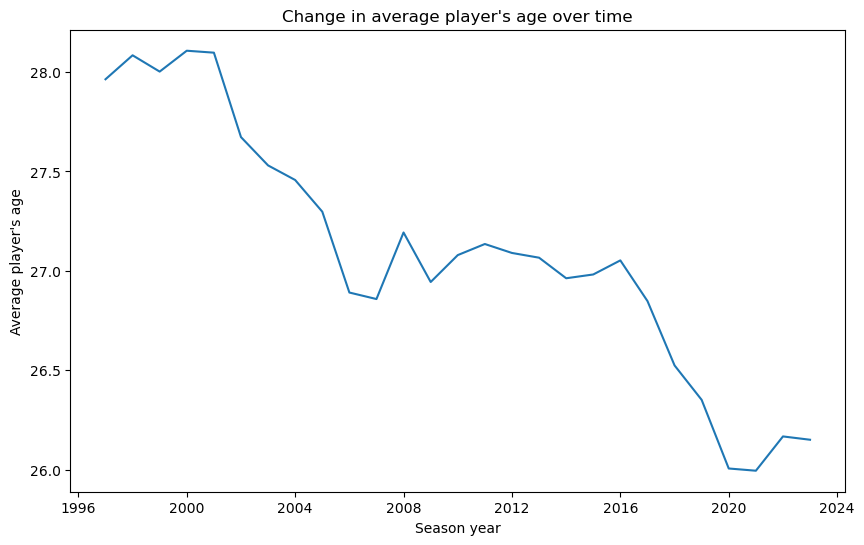

In [329]:
plt.figure(figsize=(10,6))
plt.title("Change in average player's age over time")

plt.xlabel("Season year")
plt.ylabel("Average player's age")
sns.lineplot(data=nba_data.groupby('season_parsed').age.mean())

Another important factor is age. The average age of NBA player has been constantly decining over the years. While in the earlier days, the game was much slower, it allowed older players to utilize their basketball IQ to make themselves impactful on the court. Nowadays, due to higher general rythm of the game, a lot of older players struggle to stay relevant as they just struggle to keep up with younger, more dynamic players.

In [341]:
colleges = nba_data.groupby(['college']).player_name.nunique()
colleges.sort_values(axis=0, ascending = False).head(10)

college
Kentucky          77
Duke              67
UCLA              53
Arizona           52
Kansas            52
North Carolina    50
Michigan          39
Syracuse          37
Georgia Tech      34
Michigan State    33
Name: player_name, dtype: int64

In this section, I just wanted to highlight which colleges produced the most NBA players. As expected, colleges that always had the strongest sport programs ended at the top of the list, like Kentucky, Duke, and UCLA. I was surpised to see Kentucky finishing at number 1 spot, beating Duke and UCLA.

In [326]:
nba_data['country_parsed'] = nba_data['country']
nba_data.loc[nba_data['country_parsed'] != 'USA', 'country_parsed'] = 'Other'

In [103]:
countries = nba_data.groupby(['country']).player_name.nunique()
countries = countries.sort_values(axis=0,ascending = False)
countries.iloc[1:11]

country
Canada       45
France       37
Australia    22
Croatia      15
Serbia       15
Spain        14
Argentina    14
Brazil       13
Germany      13
Lithuania    12
Name: player_name, dtype: int64

In [208]:
country_data = nba_data.groupby(['country_parsed', 'season_parsed']).size()
country_data = country_data.unstack()
country_data.loc['Split'] = country_data.apply(lambda x :(x['Other']/x['USA'])*100)
country_data = country_data.transpose()

<Axes: title={'center': 'Change in origin of players over time'}, xlabel='Season year', ylabel='Split of American to Other'>

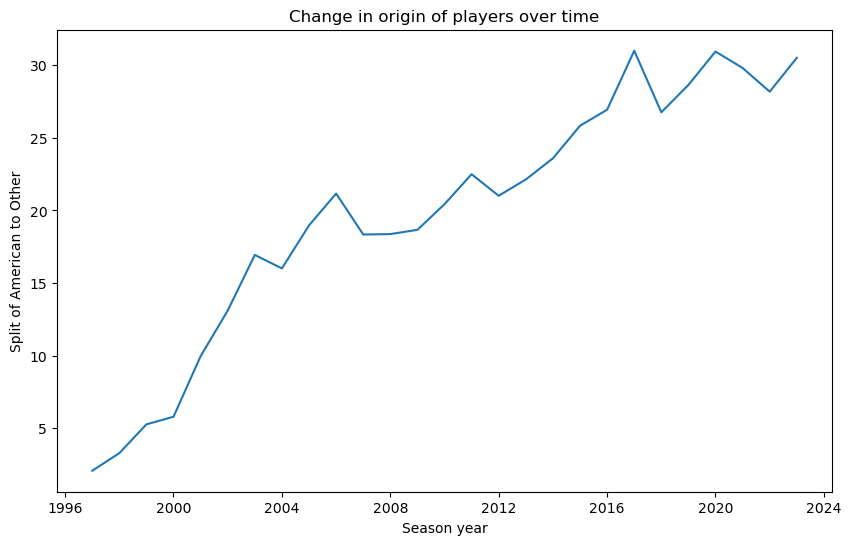

In [342]:
plt.figure(figsize=(10,6))
plt.title("Change in origin of players over time")

plt.xlabel("Season year")
plt.ylabel("Split of American to Other")
sns.lineplot(x = country_data.index, y = country_data.iloc[0:,2])

For this section of analysis, I created a new column, containing only USA or Other to see the difference in presence of players outside of USA.  

For the longest time, NBA mostly consisted of USA players. Due to factors outside the game, like globalisation, and NBA trying to expand itself to the international markets, the presence of players from outside of USA has been constantly increasing. I, also, highlighted the top countries from which the international players are coming to NBA. To my own surprise, Australia produced 22 NBA players, which put it at number 3 spot in the list of countries from which NBA players originated.

### Best performances exploration  
Now, let's look at the best from the best and what made them the best. In this section, we will be looking at some key statistics of the best performances during regular season.   

We will start with the most impactful part of the game, scoring. I will group all the players who averaged 25 points or over during the season and try to identify any patterns.

<Axes: title={'center': "Distribution of player's attributes that averaged 25 points per season"}, xlabel='Height to weight ratio', ylabel="Player's age">

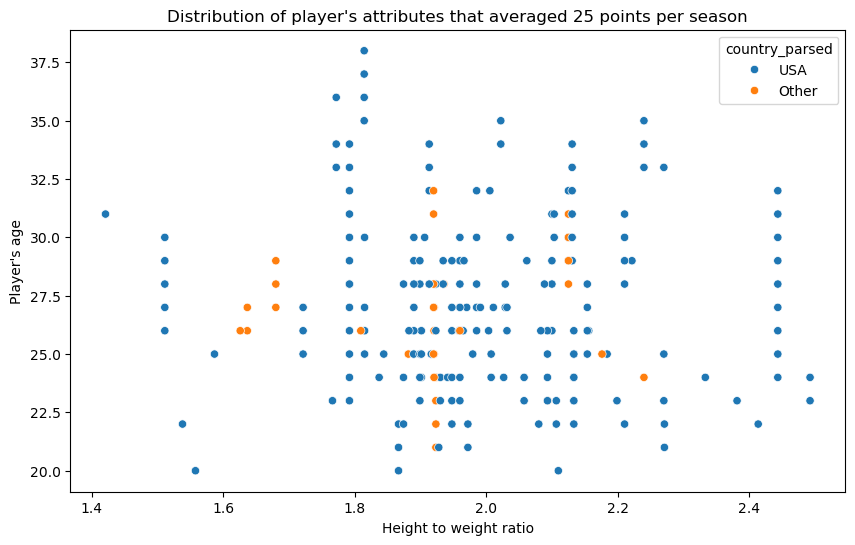

In [344]:
pts_pl = nba_data.loc[nba_data.pts >= 25]
pts_pl = pts_pl.sort_values(by = ['pts'], ascending = False)
plt.figure(figsize=(10,6))
plt.title("Distribution of player's attributes that averaged 25 points per season")

plt.xlabel("Height to weight ratio")
plt.ylabel("Player's age")
sns.scatterplot(x = pts_pl.height_to_weight, y = pts_pl.age, hue = pts_pl.country_parsed) 

From the above graph, there is one cluster present. It is located between 22.5 and 30 for player's age and between 1.8 and 2.2 for player's height to weight ratio.  
  
Due to such high dispersion of player based on the height to weight ratio, I concluded that there is no best height to weight ratio when it comes to scoring. On the other hand, players tend to produce their best performances between around 23 and 30 years of age. This is expected as these years considered the prime years for a basketball players. During these years, a player already have enough experience, but also their body is still able to produce peak results.

<Axes: title={'center': "Distribution of player's usage percentage by the average number of points"}, xlabel='Average points per season', ylabel='Usage percentage'>

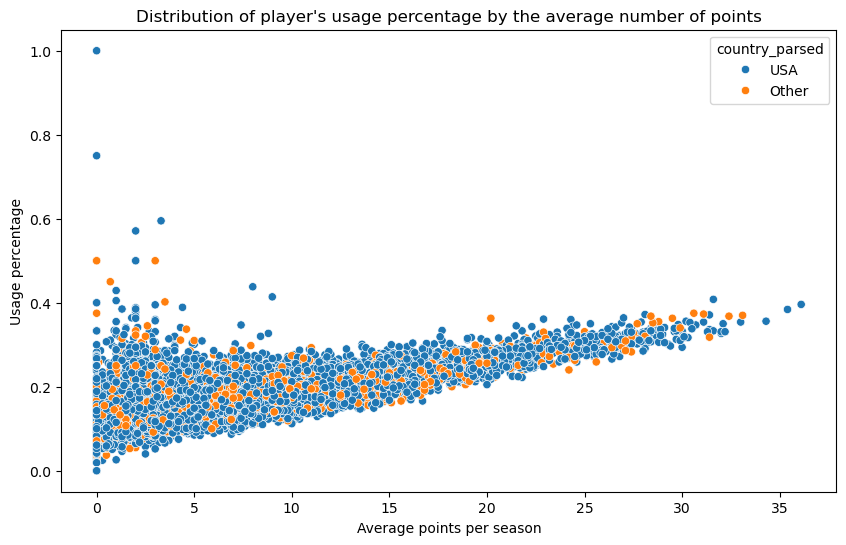

In [345]:

plt.figure(figsize=(10,6))
plt.title("Distribution of player's usage percentage by the average number of points")

plt.xlabel("Average points per season")
plt.ylabel("Usage percentage")
sns.scatterplot(x = nba_data.pts, y = nba_data.usg_pct, hue = nba_data.country_parsed)

<Axes: title={'center': "Distribution of player's usage percentage for players averaging over 25 points per season"}, xlabel='Average points per season', ylabel='Average usage percentage'>

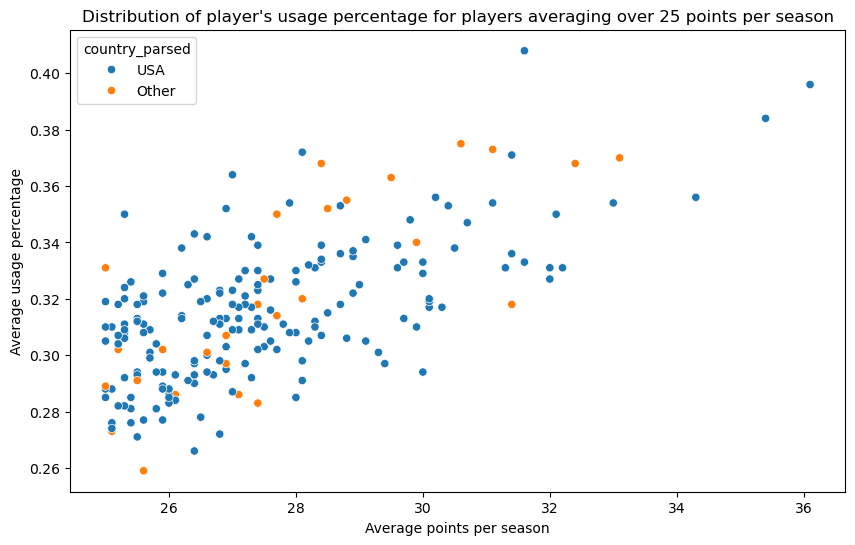

In [352]:
plt.figure(figsize=(10,6))
plt.title("Distribution of player's usage percentage for players averaging over 25 points per season")

plt.ylabel("Average usage percentage")
plt.xlabel("Average points per season")
sns.scatterplot(x = pts_pl.pts, y = pts_pl.usg_pct, hue = pts_pl.country_parsed)

In [354]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'pts', 'usg_pct', 'ts_pct', 'season']
pts_pl.sort_values(by = ['usg_pct']).head(10)[cols]

,player_name,team_abbreviation,player_height,player_weight,age,pts,usg_pct,ts_pct,season
12732,Lauri Markkanen,UTA,213.36,108.862080,26.0,25.6,0.259,0.641,2022-23
5055,Allen Iverson,DEN,182.88,81.646560,33.0,26.4,0.266,0.567,2007-08
3952,Gilbert Arenas,WAS,190.50,86.636072,23.0,25.5,0.271,0.565,2004-05
7,Glen Rice,CHH,203.20,99.790240,30.0,26.8,0.272,0.605,1996-97
3024,Dirk Nowitzki,DAL,213.36,111.130040,25.0,25.1,0.273,0.581,2002-03
9149,Karl-Anthony Towns,MIN,213.36,110.676448,21.0,25.1,0.274,0.618,2016-17
4204,Ray Allen,SEA,195.58,92.986360,30.0,25.1,0.274,0.590,2005-06
7713,James Harden,HOU,195.58,99.790240,24.0,25.4,0.276,0.618,2013-14
9139,Kevin Durant,GSW,205.74,108.862080,28.0,25.1,0.276,0.651,2016-17
12585,Anthony Davis,LAL,208.28,114.758776,30.0,25.9,0.277,0.627,2022-23


When looking at usage percentage, it increases as the player scores more points, which is expected. Interestingly, there is a big variation around usage percentage when players average 5 point or less. Mostly, it is impacted by their limited number of time they get on the court. Some players can get only 5 minutes of play time per game, and sometimes not even every game.  

When looking at the player's that averaged 25 points or more, the main cluster is located between 28% and 33% usage. This means that the player was the last person to touch the ball before the possession went to a different team, this includes field goals, free throws, and turnovers.  

I, also, highlighted the players that were able to average 25 points with the lowest usage percentage. These players were able to maintain efficient shooting throughout the season and allowed their team to take more shots.  

<Axes: title={'center': "Distribution of player's shooting efficiency for players averaging over 25 points per season"}, xlabel='Average points per season', ylabel='Average shooting efficiency'>

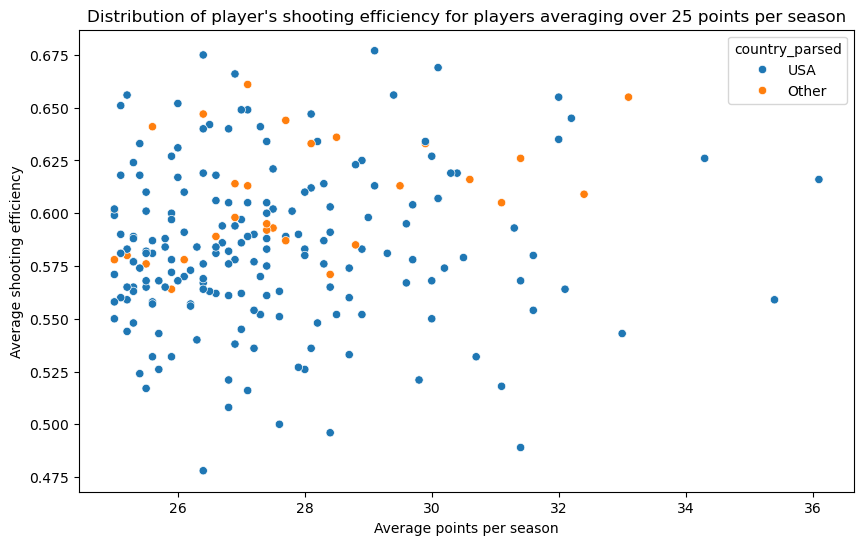

In [374]:
plt.figure(figsize=(10,6))
plt.title("Distribution of player's shooting efficiency for players averaging over 25 points per season")

plt.ylabel("Average shooting efficiency")
plt.xlabel("Average points per season")
sns.scatterplot(x = pts_pl.pts, y = pts_pl.ts_pct, hue = pts_pl.country_parsed)

In [315]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'pts', 'ts_pct', 'season']
pts_pl.loc[pts_pl.ts_pct >= 0.650].sort_values(by='ts_pct', ascending = False).head(10)[cols]

,player_name,team_abbreviation,player_height,player_weight,age,pts,ts_pct,season
12663,Kevin Durant,PHX,208.28,108.862080,34.0,29.1,0.677,2022-23
9801,Stephen Curry,GSW,190.50,86.182480,30.0,26.4,0.675,2017-18
8930,Stephen Curry,GSW,190.50,86.182480,28.0,30.1,0.669,2015-16
11568,Kevin Durant,BKN,208.28,108.862080,32.0,26.9,0.666,2020-21
12034,Nikola Jokic,DEN,210.82,128.820128,27.0,27.1,0.661,2021-22
12434,Stephen Curry,GSW,187.96,83.914520,35.0,29.4,0.656,2022-23
5045,Amar'e Stoudemire,PHX,208.28,112.944408,25.0,25.2,0.656,2007-08
12839,Joel Embiid,PHI,213.36,127.005760,29.0,33.1,0.655,2022-23
11537,Stephen Curry,GSW,190.50,83.914520,33.0,32.0,0.655,2020-21
12410,Zion Williamson,NOP,198.12,128.820128,22.0,26.0,0.652,2022-23


While maintaining low usage allows your teammates to be more involved, the more important factor is how efficient a player is when it comes to shooting.  

The above graph demonstrates that majority of the players that averaged 25 points, maintained shooting efficiency 0.55 and 0.625. If we come back to "Data exploration" section, we can find that the average shooting efficiency of NBA players stays at 0.513. This shows that in order to achieve such strong results in scoring, basketball players have to maintain above average shooting efficiency than other players.  

At next stage, we will be looking at the best rebounders. As the minimum measure, I will use 10 rebounds average.

<Axes: title={'center': "Distribution of player's offensive and defensive rebound percentage for players averaging over 10 rebounds per season"}, xlabel='Defensive rebound percentage', ylabel='Offensive rebound percentage'>

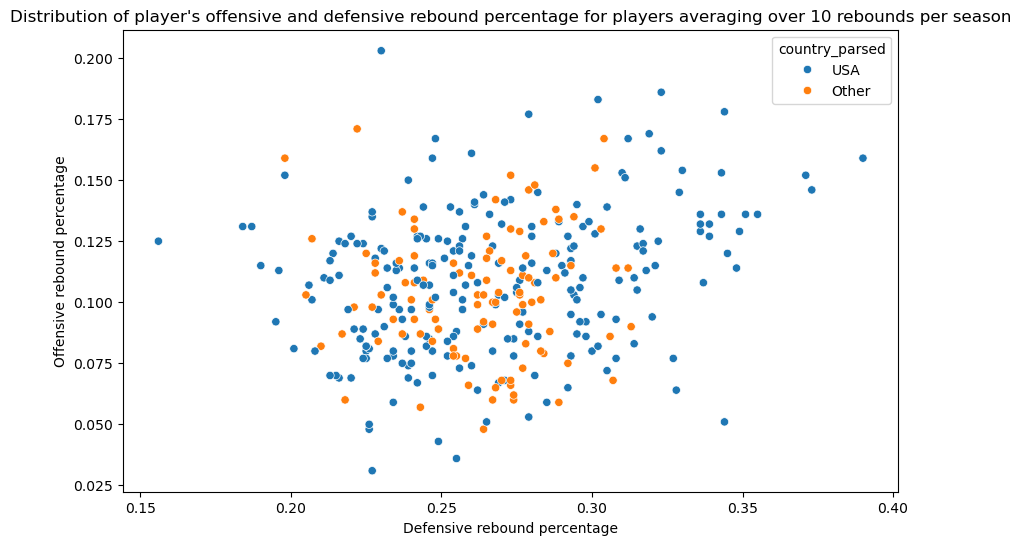

In [347]:
reb_pl = nba_data.loc[nba_data.reb >=10]
plt.figure(figsize=(10,6))
plt.title("Distribution of player's offensive and defensive rebound percentage for players averaging over 10 rebounds per season")

plt.xlabel("Defensive rebound percentage")
plt.ylabel("Offensive rebound percentage")
sns.scatterplot(x = reb_pl.dreb_pct, y = reb_pl.oreb_pct, hue = reb_pl.country_parsed)

In [319]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'reb', 'dreb_pct', 'season']
reb_pl.loc[(reb_pl.dreb_pct >=0.30) & (reb_pl.oreb_pct >= 0.15)].sort_values(by='dreb_pct', ascending = False).head(10)[cols]

,player_name,team_abbreviation,player_height,player_weight,age,reb,dreb_pct,season
7220,Reggie Evans,BKN,203.20,111.130040,33.0,11.1,0.390,2012-13
2070,Danny Fortson,GSW,203.20,117.933920,25.0,16.3,0.371,2000-01
6616,Reggie Evans,TOR,203.20,111.130040,31.0,11.5,0.344,2010-11
8767,Andre Drummond,DET,210.82,126.552168,22.0,14.8,0.343,2015-16
8563,Hassan Whiteside,MIA,213.36,120.201880,26.0,10.0,0.330,2014-15
188,Dennis Rodman,CHI,198.12,99.790240,36.0,16.1,0.323,1996-97
8446,DeAndre Jordan,LAC,210.82,120.201880,26.0,15.0,0.323,2014-15
760,Dennis Rodman,CHI,198.12,99.790240,37.0,15.0,0.319,1997-98
914,Danny Fortson,DEN,200.66,117.933920,23.0,11.6,0.312,1998-99
10286,Andre Drummond,DET,210.82,126.552168,25.0,15.6,0.311,2018-19


In [320]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'reb', 'oreb_pct', 'season']
reb_pl.loc[(reb_pl.dreb_pct >=0.30) & (reb_pl.oreb_pct >= 0.15)].sort_values(by='oreb_pct', ascending = False).head(10)[cols]

,player_name,team_abbreviation,player_height,player_weight,age,reb,oreb_pct,season
188,Dennis Rodman,CHI,198.12,99.790240,36.0,16.1,0.186,1996-97
8252,Andre Drummond,DET,210.82,126.552168,21.0,13.5,0.183,2014-15
6616,Reggie Evans,TOR,203.20,111.130040,31.0,11.5,0.178,2010-11
760,Dennis Rodman,CHI,198.12,99.790240,37.0,15.0,0.169,1997-98
914,Danny Fortson,DEN,200.66,117.933920,23.0,11.6,0.167,1998-99
7612,Anderson Varejao,CLE,210.82,117.933920,30.0,14.4,0.167,2012-13
8446,DeAndre Jordan,LAC,210.82,120.201880,26.0,15.0,0.162,2014-15
7220,Reggie Evans,BKN,203.20,111.130040,33.0,11.1,0.159,2012-13
11411,Clint Capela,ATL,208.28,108.862080,27.0,14.3,0.155,2020-21
8563,Hassan Whiteside,MIA,213.36,120.201880,26.0,10.0,0.154,2014-15


When it comes to rebounding, players that averaged above 10 rebounds were able to get around 20% to 30% on their own rim and 5% to 15% on the offensive rim.  
  
Looking at the best rebounding performances on the defensive end, Reggie Evans was grabbing nearly 40% of all rebounds on his own glass. On the other hand, the best offensive rebounder was Dennis Rodman, who was able to grab 18.6% of all offensive rebounds. This is very impressive as he was getting nearly every 5th rebound on the opponent's rim at 36 years of age. I do believe that this is not the best performance, as this statistics does not contain earlier seasons when Dennis Rodman was playing for Detroit Pistons. 

<Axes: title={'center': "Distribution of player's height to weight ratio for players averaging over 10 rebounds per season"}, xlabel='Average rebounds per season', ylabel='Height to weight ratio'>

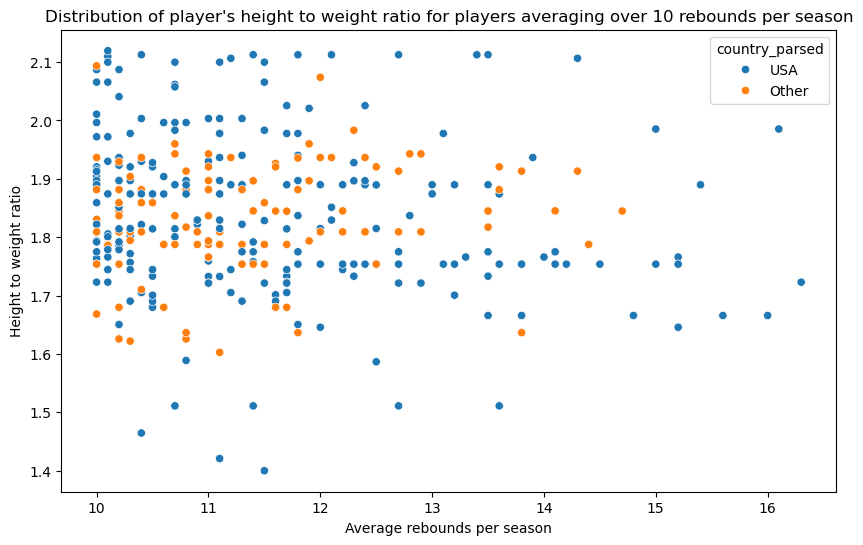

In [348]:
plt.figure(figsize=(10,6))
plt.title("Distribution of player's height to weight ratio for players averaging over 10 rebounds per season")

plt.xlabel("Average rebounds per season")
plt.ylabel("Height to weight ratio")
sns.scatterplot(y = reb_pl.height_to_weight, x = reb_pl.reb, hue=reb_pl.country_parsed) 

In [267]:
reb_pl.loc[reb_pl.player_height < 200].player_name.drop_duplicates()

138        Charles Barkley
188          Dennis Rodman
7231    Quentin Richardson
9309     Russell Westbrook
Name: player_name, dtype: object

Looking at height to weight ratio, the biggest cluster is located between 1.7 and 2 ratios. From this, it can be seen that majority of the best rebounders had big height, but more improtantly maintained lower weight.  

I, also, highlighted the players that were able to average over 10 rebounds per season who were under 2m talls. Only four players were able to do that and are highlighted above.  

Next, we will move onto assists. Once again, I used only the players that were able to maintain 10 assists on average or more during a regular season.

<Axes: title={'center': "Distribution of player's height to weight ratio for players averaging over 10 assists per season"}, xlabel='Average assists per season', ylabel='Height to weight ratio'>

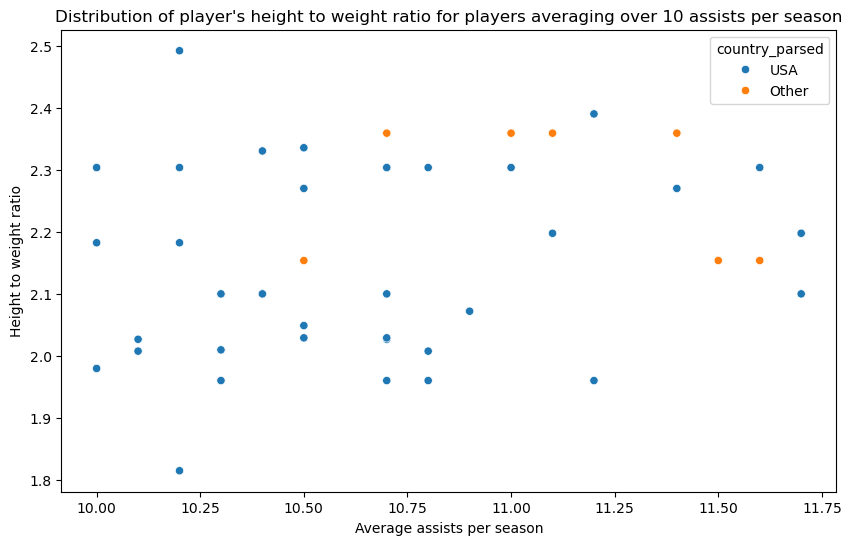

In [349]:
ast_pl = nba_data.loc[nba_data.ast >= 10]
ast_pl = ast_pl.sort_values(by = ['ast'], ascending = False)
plt.figure(figsize=(10,6))
plt.title("Distribution of player's height to weight ratio for players averaging over 10 assists per season")

plt.xlabel("Average assists per season")
plt.ylabel("Height to weight ratio")
sns.scatterplot(y = ast_pl.height_to_weight, x = ast_pl.ast, hue = ast_pl.country_parsed)

In [321]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'ast', 'season']
ast_pl.loc[ast_pl.player_height >=200][cols]

,player_name,team_abbreviation,player_height,player_weight,age,ast,season
10958,LeBron James,LAL,205.74,113.398,35.0,10.2,2019-20


Firstly, I wanted to have a look if there is a change in height to weight ratio. As can be seen from the graph above, vast majority of the players that were able to average 10 assists per game, were players that had 2 or above height to weight ratio. The distribution is completely opposite to the rebounders, the players are shorter but maintain a higher weight.  
  
I wanted to have a look as well at the players that were above 2m talls and averaged 10 assists. The only person since 1996 who was able to achieve that was the King himself, LeBron James.

<Axes: title={'center': "Distribution of player's assist percentage for players averaging over 10 assists per season"}, xlabel='Average assists per season', ylabel='Assist percentage'>

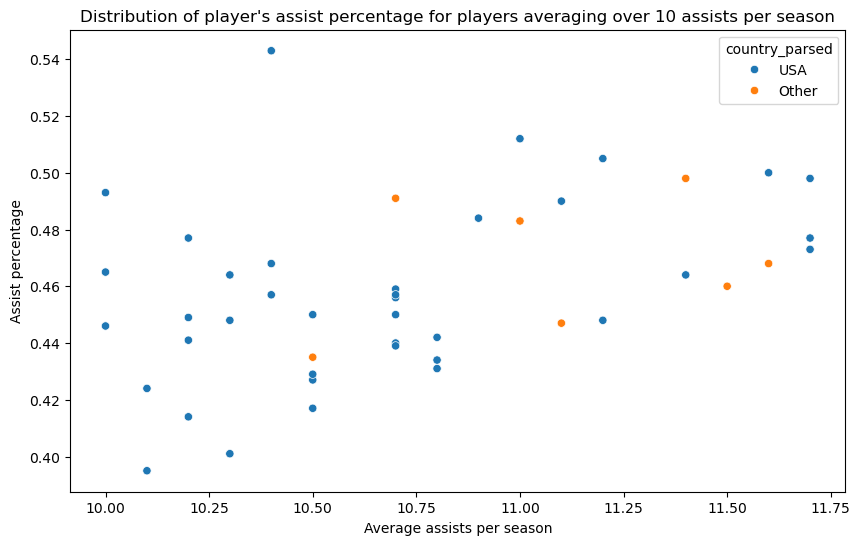

In [350]:
plt.figure(figsize=(10,6))
plt.title("Distribution of player's assist percentage for players averaging over 10 assists per season")

plt.xlabel("Average assists per season")
plt.ylabel("Assist percentage")
sns.scatterplot(y=ast_pl.ast_pct, x= ast_pl.ast, hue=ast_pl.country_parsed)

In [376]:
cols = ['player_name','team_abbreviation', 'player_height', 'player_weight', 'age', 'pts', 'ast_pct', 'season']
pts_pl.sort_values(by='ast_pct', ascending = False).head(10)[cols]

,player_name,team_abbreviation,player_height,player_weight,age,pts,ast_pct,season
9309,Russell Westbrook,OKC,190.50,90.718400,28.0,31.6,0.543,2016-17
9457,James Harden,HOU,195.58,99.790240,27.0,29.1,0.505,2016-17
10958,LeBron James,LAL,205.74,113.398000,35.0,25.3,0.477,2019-20
9821,Russell Westbrook,OKC,190.50,90.718400,29.0,25.4,0.464,2017-18
12099,Luka Doncic,DAL,200.66,104.326160,23.0,28.4,0.458,2021-22
11092,Luka Doncic,DAL,200.66,104.326160,21.0,28.8,0.454,2019-20
9996,James Harden,HOU,195.58,99.790240,28.0,30.4,0.449,2017-18
12287,Trae Young,ATL,185.42,74.389088,23.0,28.4,0.442,2021-22
9671,LeBron James,CLE,203.20,113.398000,33.0,27.5,0.432,2017-18
8141,Russell Westbrook,OKC,190.50,90.718400,26.0,28.1,0.430,2014-15


To maintain such high result, the player should be maintaining high assist percentage. From the graph above, it can be seen that in order to maintain 10 assist average, a player has to assist between 42% and 50% of all field goals when they are on the floor. This is unbelievable result as nearly every second point scored should be assisted by the player, especially considering that the league's average assist percentage sits at only 13%.  

From the table above, it can be seen that the only two players that were able to assist their teammates in more than 50% of possesions were James Harden and Russel Westbrook. In both of these scenarios, the teams were structured just around one core player, which allowed them to have absolut control of the ball and all the decisions made on the court. Such tactics are not the best for the teams, as in both of their cases, they did not manage to win NBA title and were beaten by more well balanced teams.

In [379]:
cols = ['player_name','team_abbreviation', 'age', 'pts', 'reb','ast','usg_pct','ts_pct', 'season']
nba_data.loc[(nba_data.pts >= 10.0) & (nba_data.reb >= 10.0) & (nba_data.ast >= 10.0)][cols]

,player_name,team_abbreviation,age,pts,reb,ast,usg_pct,ts_pct,season
9309,Russell Westbrook,OKC,28.0,31.6,10.7,10.4,0.408,0.554,2016-17
9821,Russell Westbrook,OKC,29.0,25.4,10.1,10.3,0.326,0.524,2017-18
10369,Russell Westbrook,OKC,30.0,22.9,11.1,10.7,0.301,0.501,2018-19
11555,Russell Westbrook,WAS,32.0,22.2,11.5,11.7,0.295,0.509,2020-21


Lastly, I wanted to highlight the incredible performance of players who were able to achieve a triple-double average. Only one person was able to do it, since 1996 and was able to do it in three consecutive years, this person being Russel Westbrook. And while his performances were historical, the plain individual statistics is not everything in NBA. That is why despite such incredible performance in regular season OKC and WAS were not able to get far in play-offs those years.

## **Conclusion**  
As a result of this analysis, I was able to highlight how the average NBA player has evolved due to change in NBA philosophy and style of play. The analysis highlights the change in trends towards more dynamic gameplay and more shooter dominant, rather than centre, which was the case in early 2000s. Also, due to NBA's expansion to a global market, the number of international players have been gradually increasing and now nearly 30% of all the NBA players were born not in USA.  

Furthermore, I had a look at the key features of the best performances during regular season. The analysis demonstrates how the best of the best players in the world were able to achieve their results as well as highlights some of most incredible performances in various categories.